<font color='red'>
<ol type='1'>
<li>Create the XOR problem 2/2</li>
<li>Create a network to solve the XOR problem with solution notes 5/5</li>
<li>Create plots for accuracy, loss, and test 2.5/3</li>
<li>Create a new harder problem 3/3</li>
<li>Create a network to solve the the harder problem with solution notes 5/5</li>
<li>Create plots for accuracy, loss, and test 2/2</li>
</ol>

Total: 19.5/20
</font>

## Homework 6 Code

In [20]:
import numpy as np
import numpy.random as R
import matplotlib.pyplot as plt
import numpy.random as R
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

# supress unnecessary warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [21]:
## generate N random samples from a 2D multivariate normal distribution
##
## with mean [mx, my]
##
## with covariance matrix [[  sx*sx, r*sx*sy],
##                         [r*sx*sy,   sy*sy]]
## where sx is the standard deviation along the x dimension
## where sy is the standard deviation along the y dimension
## where r is the correlation between the dimensions
##

def gensamples(N, mx, my, sx, sy, r):
    M   = np.array([mx, my])
    Cov = np.array([[  sx*sx, r*sx*sy],
                    [r*sx*sy,   sy*sy]])
    return (R.multivariate_normal(M, Cov, size=N, check_valid='warn'))

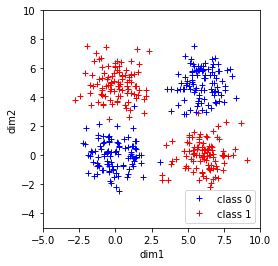

In [22]:
mx0 = 0.;  my0 = 0.
sx0 = 1.;  sy0 = 1.
r0 = 0.

mx1 = 0.; my1 = 5.
sx1 = 1.; sy1 = 1.
r1 = 0.

mx2 = 6.;  my2 = 0.
sx2 = 1.;  sy2 = 1.
r2 = 0.

mx3 = 6.; my3 = 5.
sx3 = 1.; sy3 = 1.
r3 = 0.

N = 100

sample0 = gensamples(N, mx0, my0, sx0, sy0, r0) #blue
sample1 = gensamples(N, mx3, my3, sx3, sy3, r3) #blue
sample2 = gensamples(N, mx1, my1, sx1, sy1, r1) #red
sample3 = gensamples(N, mx2, my2, sx2, sy2, r2) #red

# plot example (non-linearly seperable XOR problem)
plt.plot(sample0[:,0],sample0[:,1],'b+', sample3[:,0],sample3[:,1],'r+', sample1[:,0],sample1[:,1],'b+',sample2[:,0],sample2[:,1],'r+',)
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.axis('equal')
plt.axis('square')
plt.legend(('class 0', 'class 1'), loc='lower right')
xymin = -5; xymax = 10
plt.ylim((xymin,xymax))
plt.xlim((xymin,xymax))
plt.show()

CELLs 4 + 5 FOR Q1 

In [23]:
#formating the matrix of training patterns and the matrix of teachers
total_samples = np.concatenate([sample0, sample1, sample2, sample3]) #training patterns by n-in
teacher = np.zeros([total_samples.shape[0],1], dtype = int) #teacher by n-out

for index, each_row in enumerate (teacher): #does a for loop through the teacher matrix and puts in the correct number of 0's and 1's
    if index > ((total_samples.shape[0]/total_samples.shape[1])-1):
        each_row[0] = 1
        
shuffled_idx = R.permutation(total_samples.shape[0])
total_samples_shuffled = total_samples[shuffled_idx,:]
teacher_shuffled = teacher[shuffled_idx,:]

How did I decide on the number of hidden layers?

I chose two hidden layers because after trying 1 hidden layer, I realized by accuracy didnt go past 0.90+, and then after trying two hidden layers, the accuracy reached 0.95+, and I felt that three hidden layers or would just be redundant.

How did I decide on the number of nodes per hidden layer?

I chose the number of nodes per hidden layer through trial-and-error. I had 10 nodes for hidden layer #1, 8 nodes for hidden layer #2, and 4 nodes for hidden layer #3 (when I first tried three hidden layers), and although I did plateau in accuracy around the 0.90+ mark and plateau in loss aound the 0 mark, however, it was a not smooth increase or decrease in accuracy or loss respectively. Therefore, I decided to create a network in which the first hidden layer was at 5 nodes and the second hidden layer was at 3 nodes. This worked out great as the accuracy plateued in a fewer number of epochs with a smooth rise; the same can be said about the loss. I contribute the success of this network through being able to bottleneck the nodes (a higher number of nodes for hidden layer 1, and then a smaller number of nodes for each subsequent hidden layer (i.e 5 to 3).
  
How did I choose an optimizer?
 
I chose the optimzer adam because compared to SGD, it produced better results for my network (i.e starting at a higher baseline accuracy, and lower loss)

How did I choose a number of epochs and batch size?

I chose the number of epochs and batch sizes after using a higher number of epochs and lower/higher batch sizes, I determined that in a network of 400 samples, in which 80 are validated --> the number of epochs being 30, and the batch size--5 leads to the quickest rise in accuracy and fall in loss. I determined this through trial-and-error such as setting the batch size = 1, and number of epochs equal to 50, and released by setting the batch size so low, and the number of epochs very high, I would get high accuracy, but it would take the network a long time to do all the necessary calculations. Although a batch size of 5 is a small size, it was the optimum size for this small network to train on. 

This is how I decided upon 30 and 5--a happy medium for accuracy as well as speed in training the network. 

What information did the plots provide me?

Accuracy vs. Number of Epochs: the closer that the value got to one, I kept the variable I was manipulating the same
Loss vs. Number of Epochs: want to get the loss as close to 0 as possible
Val_Loss vs. Number of Epochs: want to keep val_loss as close to 0 as possible
Mesh Grid of Test Patterns on a 3D Graph: want to have the all the red or all the blue patterns in one color, whether that is white or black. The darker the contour, the better. 

One last addition, I used Relu instead of sigmoid for my hidden layers because it consistenly gave me better results (higher accuracy, lower loss, and lowest val_loss) even for a small network like this.

In [24]:
network = models.Sequential()

#1 input layer, 2 hidden layers, and 1 output layer
nin = 2
nhid1 = 5
nhid2 = 3
nout = 1

#adds the two hidden layers to the network
network.add(layers.Dense(nhid1,activation='relu', input_shape=(nin,)))
network.add(layers.Dense(nhid2,activation='relu'))
network.add(layers.Dense(nout,activation='sigmoid'))

#compiles the network 
compile_network = network.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=['accuracy', 'mse'])

#trains the network
history = network.fit(total_samples_shuffled,
                      teacher_shuffled,
                      verbose=False,
                      validation_split=.2,
                      epochs=30,
                      batch_size=5)

CELL 6 FOR Q2

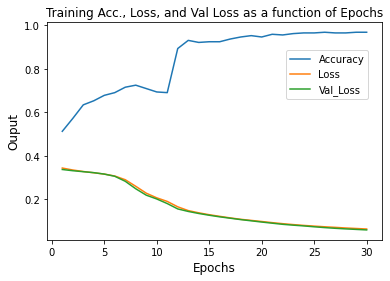

In [25]:
# Creates a function that takes in the parameters for title, a label for the x axis, 
# a label for the y axis, font size, input values (x values), a list of list containing the y values from the operation done to the input values, 
# and the name of the function  With this information, a certain number of lines (dependent on the number of functions) are plotted on the same figure 
# containing a x label, y label, title, and a figure legend.

def overlap_plot (title, xlabel, ylabel, fontsize, inputs, list_func, names_func):
    fig = plt.figure()
    plt.xlabel(xlabel, fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.title(title, fontsize = fontsize)
    graph_list = []
    for ind_func in list_func:
        p, = plt.plot(inputs, ind_func)
        graph_list.append(p)
    plt.figlegend(graph_list, names_func, bbox_to_anchor=(0.88, 0.80))
    
#the number of epochs; this is your y values
n_epochs = len(history.history['loss'])

#an array from 1 to the number of epochs; this is your x values
input_array = np.arange(1,(n_epochs+1),1)

#calculations to calculate the accuracy, loss, and val_loss for the neural network
accuracy = history.history['accuracy']
loss = history.history['loss']
val_loss =  history.history['val_loss']

#a list containing the values accuracy, loss, and val_loss
func_list = [accuracy, loss, val_loss]

#a list containing the names of accuracy, loss, and val_loss
names_func = ['Accuracy', 'Loss', 'Val_Loss']

#calls the above function
overlap_plot ('Training Acc., Loss, and Val Loss as a function of Epochs', 'Epochs', 'Ouput', 12, input_array, func_list, names_func)

<font color='red'>
Plotting both accuracy and validation loss doesn't make sense. They are very different scales which mask effects of loss over time. -.5
</font>

CELLS 7-9 ARE FOR Q3

In [26]:
# generate test pattern array for Q4

xymin = -5
xymax = 10
Npts = 50
xv, yv = np.meshgrid(np.linspace(xymin, xymax, Npts), 
                     np.linspace(xymin, xymax, Npts))
test_pats = np.concatenate((xv.reshape((Npts*Npts,1)), 
                            yv.reshape((Npts*Npts,1))), axis=1)

In [27]:
# function for generating plot for Q4
# xv is array of x-values of test grid (from meshgrid)
# yv is array of y-values of test grid (from meshgrid)
# out is the output of the neural network given the test patterns
# sample0, sample1 are the training patterns from earlier

def plottest(xv, yv, out, sample0, sample1, sample2, sample3):
    # reshape out
    zv = out.reshape(xv.shape)

    # create figure
    fig = plt.figure()
    plt.contourf(xv, yv, zv, levels=xv.shape[0], cmap=plt.cm.gist_yarg)
    plt.plot(sample0[:,0], sample0[:,1], 'b+', 
             sample1[:,0], sample1[:,1], 'b+',
             sample2[:,0],sample2[:,1],'r+',
             sample3[:,0],sample3[:,1],'r+')    
    
    plt.xlabel('dim1')
    plt.ylabel('dim2')
    plt.axis('equal')
    plt.axis('square')
    xymin = -5; xymax = 10
    plt.ylim((xymin,xymax))
    plt.xlim((xymin,xymax))
    plt.show()

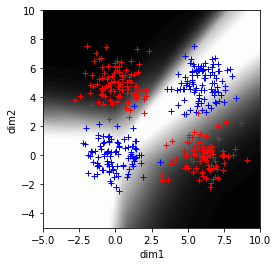

In [28]:
#test the network on test_pats
out_test = network.predict(test_pats)

#uses the plottest function to plot a contour map based on the output of the neural network1 given the test patterns
plottest (xv, yv, out_test, sample0, sample1, sample2, sample3)

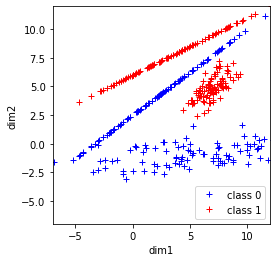

In [29]:
mx0 = 2.;  my0 = 4.
sx0 = 4.;  sy0 = 3.
r0 = 1

mx1 = 7.; my1 = 5.
sx1 = 1.; sy1 = 1.
r1 = 0.7

mx2 = 4.;  my2 = 8.
sx2 = 4.;  sy2 = 2.
r2 = 1

mx3 = 6.; my3 = -1.
sx3 = 5.; sy3 = 1.
r3 = 0.5

N = 100

sample4 = gensamples(N, mx0, my0, sx0, sy0, r0) #blue
sample5 = gensamples(N, mx3, my3, sx3, sy3, r3) #blue
sample6 = gensamples(N, mx1, my1, sx1, sy1, r1) #red
sample7 = gensamples(N, mx2, my2, sx2, sy2, r2) #red

# plot example (non-linearly seperable problem)
plt.plot(sample4[:,0],sample4[:,1],'b+',sample7[:,0],sample7[:,1],'r+',sample5[:,0],sample5[:,1],'b+',sample6[:,0],sample6[:,1],'r+')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.axis('equal')
plt.axis('square')
plt.legend(('class 0', 'class 1'), loc='lower right')
xymin = -7; xymax = 12
plt.ylim((xymin,xymax))
plt.xlim((xymin,xymax))
plt.show()

In [30]:
#formating the matrix of training patterns and the matrix of teachers
total_samples1 = np.concatenate([sample4, sample5, sample6, sample7]) #training patterns by n-in
teacher1 = np.zeros([total_samples1.shape[0],1], dtype = int) #teacher by n-out

for index, each_row in enumerate (teacher1): #does a for loop through the teacher matrix and puts in the correct number of 0's and 1's
    if index > ((total_samples1.shape[0]/total_samples1.shape[1])-1):
        each_row[0] = 1
        
shuffled_idx1 = R.permutation(total_samples1.shape[0])
total_samples_shuffled1 = total_samples1[shuffled_idx1,:]
teacher_shuffled1 = teacher1[shuffled_idx1,:]

How did I decide on the number of hidden layers?

I chose three hidden layers because after trying various number of hidden layers (1 hidden layers with multiple nodes (15), 2 hidden layers bottlenecking it down from 15 to 7), I was still not able to get to accuracy that I wanted. Therefore, I added another hidden layer with the number of nodes close to 1 (nout); this helped me make a network with a remarkably high accuracy, and low loss. 

How did I decide on the number of nodes per hidden layer?

I chose the number of nodes per hidden layer through trial-and-error. Using what I learned from Q1-Q3, I went off this assumption, and I started to increase + decrease the number of nodes by layer from 10 nodes in hidden layer 1 to 4 nodes in hidden layer 2, to 7 nodes in hidden layer 3. However, this caused my network to stop at 0.90 accuracy, and my loss to be too high. Therefore, I went back to the bottle-necking effect since it provided me with a high accuracy (hidden layer1 = 10 nodes, hidden layer2 = 7 nodes, hidden layer3 = 4 nodes)

How did I choose an optimizer?

I chose the optimzer adam because compared to SGD, it produced better results for my network (i.e starting at a higher baseline accuracy, and lower loss). When I tried SGD, my accuracy plateued at 0.90 and my val_loss stopped at 0.38. Not liking this, I switched back to adam, and I was able to have a higher accuracy, lower loss, and lower val_loss.

How did I choose a number of epochs and batch size?

I chose the number of epochs and batch sizes after using a higher number of epochs and lower/higher batch sizes, I determined that in a network of 400 samples, in which 80 are validated --> the number of epochs being 40, and the batch size--10 leads to the quickest rise in accuracy and fall in loss. I determined this through trial-and-error such as keeping the number of epochs at 20, and the batch size at 10, but I still didnt get the highest accuracy as I would have liked or the lowest loss either. After trying various combinations (number of epochs: 25, batch size: 20, number of epochs: 30, batch size: 10, number of epochs: 25, batch size: 15), I arrived that 30 epochs with a batch size of 10 is the best way to train this network. 

What information did the plots provide me?

Accuracy vs. Number of Epochs: the closer that the value got the one, I kept the variable I was manipulating the same
Loss vs. Number of Epochs: want to get the loss as close to 0 as possible
Val_Loss vs. Number of Epochs: want to keep val_loss as close to 0 as possible
Mesh Grid of Test Patterns on a 3D Graph: want to have the all the red or all the blue patterns in one color, whether that is white or black. The darker the contour, the better. 

One last addition, I used Relu instead of sigmoid for my hidden layers because it consistenly gave me better results (higher accuracy, lower loss, and lowest val_loss).

In [31]:
network1 = models.Sequential()

#1 input layer, 5 hidden layers, and 1 output layer
nin = 2
nhid1 = 10
nhid2 = 7
nhid3 = 4
nout = 1

#adds the fiev hidden layers to the network
network1.add(layers.Dense(nhid1,activation='relu', input_shape=(nin,)))
network1.add(layers.Dense(nhid2,activation='relu'))
network1.add(layers.Dense(nhid3,activation='relu'))
network1.add(layers.Dense(nout,activation='sigmoid'))

#compiles the network 
compile_network1 = network1.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=['accuracy', 'mse'])

#trains the network
history1 = network1.fit(total_samples_shuffled1,
                      teacher_shuffled1,
                      verbose=False,
                      validation_split=.2,
                      epochs=30,
                      batch_size=10)

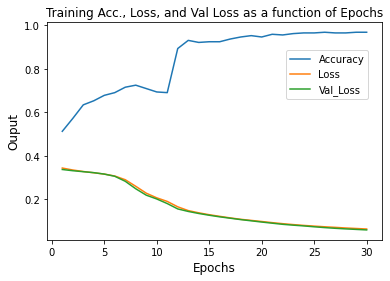

In [33]:
#calculations to calculate the accuracy, loss, and val_loss for the neural network
accuracy1 = history1.history['accuracy']
loss1 = history1.history['loss']
val_loss1 =  history1.history['val_loss']

#calls the above function
overlap_plot ('Training Acc., Loss, and Val Loss as a function of Epochs', 'Epochs', 'Ouput', 12, input_array, func_list, names_func)

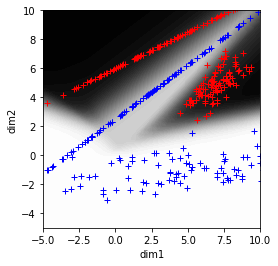

In [34]:
#test the network on test_pats
out_test = network1.predict(test_pats)

#uses the plottest function to plot a contour map based on the output of the neural network1 given the test patterns
plottest (xv, yv, out_test, sample4, sample5, sample6, sample7)